In [104]:
import warnings
warnings.filterwarnings("ignore")

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPool2D, UpSampling2D  #Maxpool layer is like down sampling 
from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [106]:
IMAGE_SIZE = 256

In [107]:
# out task is to read the image 

image = load_img("/content/Mona_Lisa.jpg", 
                 target_size= (IMAGE_SIZE,IMAGE_SIZE))

# Normalizing and converting to images
img_arr = img_to_array(image)/255

img_arr.shape

(256, 256, 3)

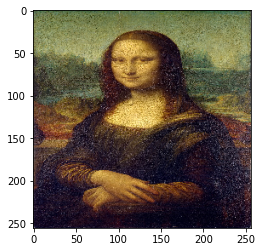

In [108]:
# to see our image 
plt.imshow(img_arr)
plt.show()

In [109]:
# we will expand the dimention of our input image 

img_arr = np.expand_dims(img_arr, axis= 0)

img_arr.shape

(1, 256, 256, 3)

In [110]:
## Creating our Autoencoder model 

model = Sequential()
model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE,3)))
# Encoding Process
model.add(Conv2D(filters= 32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPool2D(pool_size=(2,2), padding= 'same'))
model.add(Conv2D(filters= 8, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPool2D(pool_size=(2,2), padding= 'same'))
model.add(Conv2D(filters= 8, kernel_size= (3,3), activation= 'relu', padding= 'same'))

model.add(MaxPool2D(pool_size=(2,2), padding= 'same')) 

# Decoding Process
model.add(Conv2D(filters= 8, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(UpSampling2D(size= (2,2)))
model.add(Conv2D(filters= 8, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(UpSampling2D(size= (2,2)))
model.add(Conv2D(filters= 32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(UpSampling2D(size= (2,2)))
model.add(Conv2D(filters= 3, kernel_size= (3,3), activation= 'relu', padding= 'same')) # the ouput image is 256,256,3

model.compile(optimizer='adam', loss= "mean_squared_error", metrics=['acc'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 128, 128, 8)       2312      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 64, 64, 8)         584       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 32, 32, 8)       

In [111]:
# defining our call backs

mc = ModelCheckpoint( filepath= "bestmodel.h5", monitor= "acc" , verbose= 1, save_best_only=True)
es = EarlyStopping(monitor="acc", min_delta= 0.01, patience= 4, verbose= 1)

cb = [mc]

In [137]:
# load the data 

history = model.fit(x = img_arr, y = img_arr, epochs= 100, shuffle= True, callbacks= cb, batch_size=16)

Epoch 1/100
1/1 [==============================] - 1s 505ms/step - loss: 0.0069 - acc: 0.8279

Epoch 00001: acc did not improve from 0.82976
Epoch 2/100
1/1 [==============================] - 0s 221ms/step - loss: 0.0069 - acc: 0.8297

Epoch 00002: acc did not improve from 0.82976
Epoch 3/100
1/1 [==============================] - 0s 211ms/step - loss: 0.0069 - acc: 0.8284

Epoch 00003: acc did not improve from 0.82976
Epoch 4/100
1/1 [==============================] - 0s 204ms/step - loss: 0.0069 - acc: 0.8296

Epoch 00004: acc did not improve from 0.82976
Epoch 5/100
1/1 [==============================] - 0s 212ms/step - loss: 0.0069 - acc: 0.8291

Epoch 00005: acc did not improve from 0.82976
Epoch 6/100
1/1 [==============================] - 0s 216ms/step - loss: 0.0069 - acc: 0.8293

Epoch 00006: acc did not improve from 0.82976
Epoch 7/100
1/1 [==============================] - 0s 222ms/step - loss: 0.0069 - acc: 0.8298

Epoch 00007: acc improved from 0.82976 to 0.82985, saving m

In [138]:
model = load_model("bestmodel.h5")

In [139]:
reconstructed_image = model.predict(img_arr)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


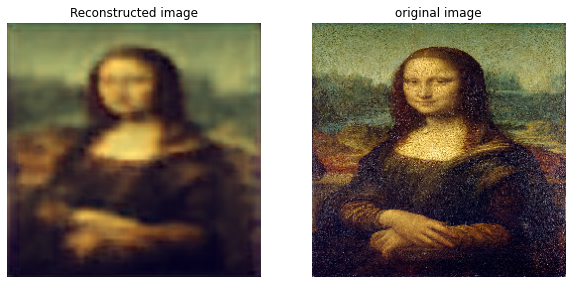

In [140]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(reconstructed_image[0].reshape(IMAGE_SIZE,IMAGE_SIZE,3))
plt.title("Reconstructed image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_arr[0])
plt.title("original image")
plt.axis('off')



plt.show()